# Using `DICOM.jl` to load a 3D CT Volume

This notebook is a tutorial for how to import DICOM files in Julia using the `DICOM.jl` package.

In [1]:
using DICOM
using Interact, Plots

WebIO._IJuliaInit()

In [2]:
# This volume is comprised of 133 individual slices
run(`ls -C ../data/cxr/`)

069.xml		1-027.dcm	1-054.dcm	1-081.dcm	1-108.dcm
1-001.dcm	1-028.dcm	1-055.dcm	1-082.dcm	1-109.dcm
1-002.dcm	1-029.dcm	1-056.dcm	1-083.dcm	1-110.dcm
1-003.dcm	1-030.dcm	1-057.dcm	1-084.dcm	1-111.dcm
1-004.dcm	1-031.dcm	1-058.dcm	1-085.dcm	1-112.dcm
1-005.dcm	1-032.dcm	1-059.dcm	1-086.dcm	1-113.dcm
1-006.dcm	1-033.dcm	1-060.dcm	1-087.dcm	1-114.dcm
1-007.dcm	1-034.dcm	1-061.dcm	1-088.dcm	1-115.dcm
1-008.dcm	1-035.dcm	1-062.dcm	1-089.dcm	1-116.dcm
1-009.dcm	1-036.dcm	1-063.dcm	1-090.dcm	1-117.dcm
1-010.dcm	1-037.dcm	1-064.dcm	1-091.dcm	1-118.dcm
1-011.dcm	1-038.dcm	1-065.dcm	1-092.dcm	1-119.dcm
1-012.dcm	1-039.dcm	1-066.dcm	1-093.dcm	1-120.dcm
1-013.dcm	1-040.dcm	1-067.dcm	1-094.dcm	1-121.dcm
1-014.dcm	1-041.dcm	1-068.dcm	1-095.dcm	1-122.dcm
1-015.dcm	1-042.dcm	1-069.dcm	1-096.dcm	1-123.dcm
1-016.dcm	1-043.dcm	1-070.dcm	1-097.dcm	1-124.dcm
1-017.dcm	1-044.dcm	1-071.dcm	1-098.dcm	1-125.dcm
1-018.dcm	1-045.dcm	1-072.dcm	1-099.dcm	1-126.dcm
1-019.dcm	1-046.dcm	1-073.dcm	1-100.dcm	1-127.dcm
1

Process(`ls -C ../data/cxr/`, ProcessExited(0))

## Reading individual `.dcm` files

`DICOM.jl` reads `.dcm` files into a `DICOMData` class.
The class is basically a dictionary for all the different datatypes stored in a DICOM file.

The keys of the dictionary are hex tags corresponding to different datatypes.
[This file](https://github.com/JuliaHealth/DICOM.jl/blob/master/src/dcm_dict.jl) shows what data all the keys correspond to.

In [3]:
dcm_data = dcm_parse("../data/cxr/1-001.dcm")
keys(dcm_data)

KeySet for a Dict{Tuple{UInt16, UInt16}, Any} with 97 entries. Keys:
  (0x0040, 0x2016)
  (0x0012, 0x0063)
  (0x0028, 0x0303)
  (0x0010, 0x0010)
  (0x0018, 0x1111)
  (0x0008, 0x0030)
  (0x0040, 0xa123)
  (0x0018, 0x1140)
  (0x0002, 0x0016)
  (0x0020, 0x0052)
  (0x0028, 0x0100)
  (0x0013, 0x0010)
  (0x0002, 0x0001)
  (0x0020, 0x0037)
  (0x0008, 0x1090)
  (0x0018, 0x5100)
  (0x0010, 0x1010)
  (0x0018, 0x1160)
  (0x0002, 0x0012)
  (0x0040, 0xa124)
  (0x0002, 0x0002)
  (0x0040, 0x0244)
  (0x0013, 0x1010)
  (0x0040, 0x2017)
  (0x0028, 0x1052)
  ⋮

The hex tag corresponding to the actual image is `7FE0,0010`.

You can access the image data either using `dcm_data[(7FE0,0010)]` or `dcm_data[tag"PixelData"]`.

`img_data` is a (512, 512) matrix


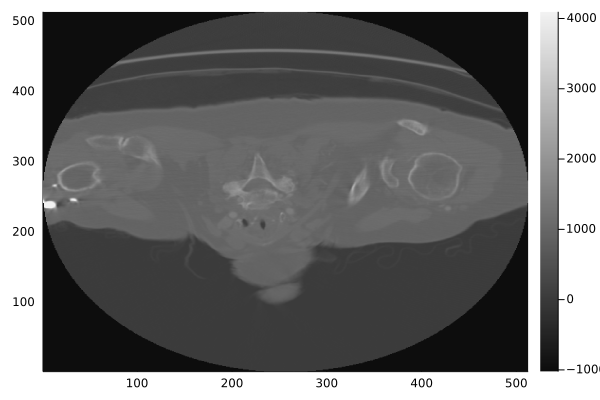

In [4]:
img_data = dcm_data[tag"PixelData"]
nx, ny = size(img_data)
println("`img_data` is a $((nx, ny)) matrix")
heatmap(img_data, c=:grays)

## Reading a directory of `.dcm` files

In [5]:
# Read multiple .dcm files
dcm_data_array = dcmdir_parse("../data/cxr/")
n_dcm = length(dcm_data_array)
print("There are $(n_dcm) DICOM files in the directory")

There are 133 DICOM files in the directory

In [6]:
# Load the slices into a single volume
ct_volume = Array{Int16}(undef, (n_dcm, nx, ny))

for i in 1:n_dcm
    # A little slice reordering is necessary to get this looking right
    slice = dcm_data_array[end-i+1][tag"PixelData"][end:-1:1, :]
    ct_volume[i, :, :] = slice
end

In [7]:
# Plot the CT and move through the transverse plane
@manipulate for slice in 1:n_dcm
    heatmap(
        ct_volume[slice, :, :], 
        c=:grays, 
        clims=(minimum(ct_volume), maximum(ct_volume))
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["slice"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 133, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
67, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/vivek/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/vivek/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/vivek/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/vivek/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/vivek/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000028882a570, Task (runnable) @0x000000028882a570), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\"

In [8]:
# Plot the CT and move through the frontal and saggital plane
@manipulate for slice in 1:512
    p1 = heatmap(
        ct_volume[:, slice, :], 
        c=:grays,
        cbar=nothing, 
        clims=(minimum(ct_volume), maximum(ct_volume))
    )
    p2 = heatmap(
        ct_volume[:, :, slice], 
        c=:grays, 
        clims=(minimum(ct_volume), maximum(ct_volume))
    )
    plot(p1, p2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["slice"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 512, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
256, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/vivek/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/vivek/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/vivek/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/vivek/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/vivek/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010ca35150, Task (runnable) @0x000000010ca35150), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\